# Prac 5

## Q1 PCA函数

In [2]:
import numpy as np
def PCA(X, n_components=2):
    cov_X = np.cov(X, rowvar=False)
    eig_val, eig_vect = np.linalg.eig(cov_X)
    eig_inds = np.flip(np.argsort(eig_val))
    return np.matmul(X, eig_vect[:,eig_inds[:n_components]]), np.take_along_axis(eig_val,eig_inds,axis=0)
    

## Q2 
将主成分的第一第二个元素作图，颜色表示class  
前两个主要成分占数据方差的百分比是多少?  
根据结果，生成一个类似于Alpaydin书的6.2图。

In [4]:
from scipy.io import loadmat
mnist = loadmat('mnist_train.mat')
X = mnist['train_X']
Y = mnist['train_labels']

In [30]:
Y[:,0]

array([ 1,  1,  1, ..., 10, 10, 10], dtype=uint8)

In [7]:
reduced_X, eig_vals = PCA(X, n_components=2)

In [8]:
import matplotlib.pyplot as plt
colour_set = np.array(['r','g','b','k','c','y','m','#fcba03', '#03c2fc', '#ff0345'])
cY = Y-1

将主成分的第一第二个元素作图，颜色表示class。  
用plt和sns分别画一画

Text(0, 0.5, 'Second Principal Component')

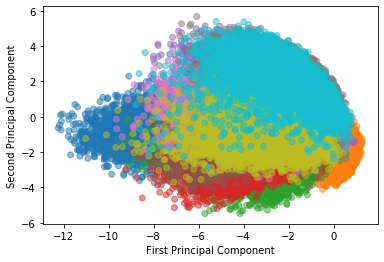

In [9]:
plt.scatter(reduced_X[:,0], reduced_X[:,1],c=cY[:,0], cmap='tab10', alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

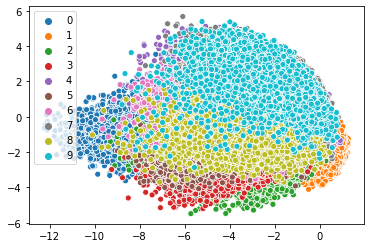

In [11]:
import seaborn as sns
cY = Y[:,0]-1
sns.scatterplot(reduced_X[:,0],reduced_X[:,1], hue=cY, palette=sns.color_palette())

前两个主要成分占数据方差的百分比是多少?

根据结果，生成一个类似于Alpaydin书的6.2图。

Text(0.5, 1.0, 'Scree Graph')

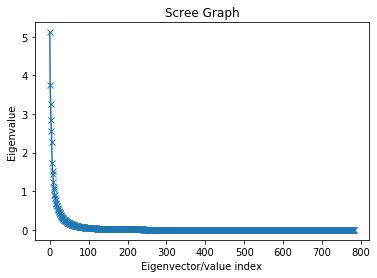

In [13]:
plt.plot(eig_vals, '-x')
plt.xlabel('Eigenvector/value index')
plt.ylabel('Eigenvalue')
plt.title('Scree Graph')

Text(0, 0.5, 'Proportion of Variance')

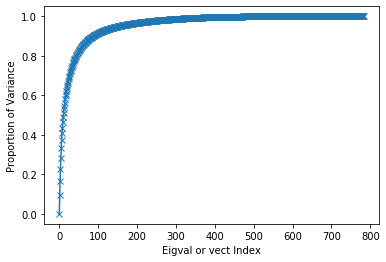

In [14]:
eig_var_prop = []
for i in range(eig_vals.shape[0]):
    eig_var_prop.append(eig_vals[:i].sum()/eig_vals.sum())
plt.plot(eig_var_prop,'-x')
plt.xlabel('Eigval or vect Index')
plt.ylabel('Proportion of Variance')

## Q3 相同的步骤，在糖尿病和蛋糕数据里试
这里糖尿病数据集有两种处理方法，dataframe也是可以用PCA函数的，而因为有8个特征，因此在二维图里面不是很好表现

In [92]:
import pandas
pima_data = pandas.read_csv('pima_indians_diabetes.csv')
pima_data_train = pima_data.loc[:499,:]
pima_data_test = pima_data.loc[500:,:]
pima_data_train_X = np.array(pima_data_train.drop(['9'], axis=1))
labels = pima_data_train['9']
labels[labels=='pos'] = 1
labels[labels=='neg'] = 0
labels = np.array(labels)
# pima_data_train_X
# labels

C:\Users\J.G\Anaconda2\envs\py3k\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\J.G\Anaconda2\envs\py3k\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [87]:
reduced_X_pima, eig_vals_pima = PCA(pima_data_train_X, n_components=8)

In [81]:
np.array(reduced_X_pima.loc[:,['1','2']])
reduced_X.shape
# reduced_X_pima.shape
# eig_vals_pima.shape
eig_vals.shape
# np.array(reduced_X_pima.loc[:,['1','2']])[:,0]
eig_vals.shape[0]

784

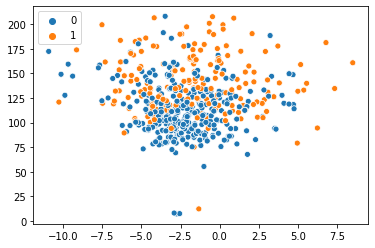

In [96]:
# sns.scatterplot(np.array(reduced_X_pima.loc[:,['1','2']])[:,0], \
#                 np.array(reduced_X_pima.loc[:,['1','2']])[:,1], hue=labels)
sns.scatterplot(reduced_X_pima[:,6],reduced_X_pima[:,1], hue=labels)

Text(0.5, 1.0, 'Scree Graph')

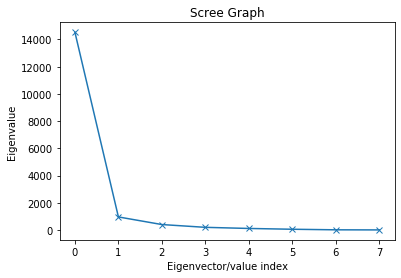

In [61]:
plt.plot(eig_vals_pima, '-x')
plt.xlabel('Eigenvector/value index')
plt.ylabel('Eigenvalue')
plt.title('Scree Graph')

Text(0, 0.5, 'Proportion of Variance')

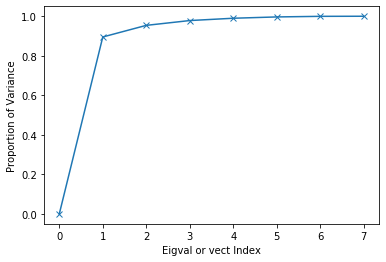

In [82]:
eig_var_prop = []
for i in range(eig_vals_pima.shape[0]):
    eig_var_prop.append(eig_vals_pima[:i].sum()/eig_vals_pima.sum())
plt.plot(eig_var_prop,'-x')
plt.xlabel('Eigval or vect Index')
plt.ylabel('Proportion of Variance')

In [ ]:
swiss_row = loadmat('swiss_roll_data.mat')
X_swiss = swiss_row['X_data']
Y_swiss = swiss_row['Y_data']
X_swiss.shape

In [ ]:
X_reduced_swiss, eig_vals = PCA(X_swiss,n_components=2)
X_reduced_swiss.shape